# Basic Ear Training App using Google Colab and Python
#### Renato Profeta - www.youtube.com/@Guitars4RL


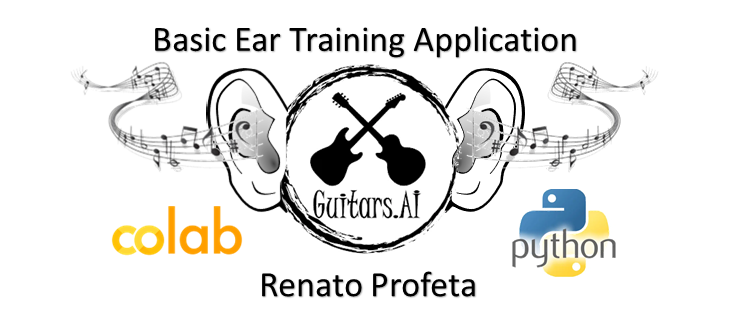

In [ ]:
# @title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/videoseries?si=XC7medxJlLvaRuGv&amp;list=PL6QnpHKwdPYjLr4gZjCPhZBrvvzZo632F" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## Setup Google Colab

In [ ]:
# @title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/Xcz5CItYyPY?si=wU7_V9aDv0RWoInS" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

### Install Musescore3

In [ ]:
# Install Musescore3
!yes | add-apt-repository ppa:mscore-ubuntu/mscore3-stable
!apt update
!apt install musescore3

Repository: 'deb https://ppa.launchpadcontent.net/mscore-ubuntu/mscore3-stable/ubuntu/ jammy main'
Description:
~~~~~~~~~ MUSESCORE 3 RELEASES FOR UBUNTU 18.04 AND LATER ~~~~~~~~~
Note that Canonical doesn’t allow new builds for releases marked obsolete
(any nōn-LTS predating the previous LTS (currently 24.04 “noble”), and any LTS
older than 7 years, currently anything before 14.04 “trusty”). The packages
for those older releases here can no longer be updated but still work, within
limitations. Best to upgrade to a supported release of the operating system!

INSTALLING: (run these commands from the terminal)
  sudo add-apt-repository ppa:mscore-ubuntu/mscore3-stable
  sudo apt-get update
  sudo apt-get install musescore3

DO *NOT* USE THESE PPAs on Debian, only on Ubuntu!

‣‣‣ These packages are NOT suitable for ”KDE neon 18.04 (bionic)”!
‣ Use https://build.opensuse.org/project/show/home:mirabile:mscore instead.
⚠ KDE neon 18.04 was discontinued so those packages can no longer be upda

### Install Fluidsynth

In [ ]:
!apt install fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth3 libinstpatch-1.0-2 qsynth
Suggested packages:
  fluid-soundfont-gs jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth3 libinstpatch-1.0-2 qsynth
0 upgraded, 5 newly installed, 0 to remove and 93 not upgraded.
Need to get 130 MB of archives.
After this operation, 151 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fluid-soundfont-gm all 3.1-5.3 [130 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libinstpatch-1.0-2 amd64 1.1.6-1 [240 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libfluidsynth3 amd64 2.2.5-1 [246 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fluidsynth amd64 2.2.5-1 [27.4 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 qsy

## Imports

In [ ]:
# Audio and Music
import librosa
from music21 import *
# Random
import random
# Browser Controls and Display
import ipywidgets as widgets
import IPython.display as ipd

## The EarTraining Class

In [ ]:
class EarTrainig():
    def __init__(self, n_low = 'A2', n_high = 'C6' , root = 'random', quality = 'major',
                 dur = 4.0,style = 'melodic', direction = 'Ascending'):

        self.intervals_str = ['P1','m2','M2','m3','M3','P4','d5','P5','a5','m6','M6','m7','M7']
        self.intervals_mus = [interval.Interval(p) for p in self.intervals_str]
        self.diads = dict(zip(self.intervals_str[1:],[[interval.Interval('P1'),i] for i in self.intervals_mus[1:]]))
        self.major = [interval.Interval('P1'), interval.Interval('M3'),interval.Interval('P5')]
        self.minor = [interval.Interval('P1'),interval.Interval('m3'), interval.Interval('P5')]
        self.sus2 = [interval.Interval('P1'),interval.Interval('M2'),interval.Interval('P5')]
        self.sus4 = [interval.Interval('P1'),interval.Interval('P4'),interval.Interval('P5')]
        self.aug = [interval.Interval('P1'), interval.Interval('M3'), interval.Interval('a5')]
        self.dim = [interval.Interval('P1'),interval.Interval('m3'),interval.Interval('d5')]
        self.triads = {'major':self.major,'minor':self.minor,'sus2':self.sus2,'sus4':self.sus4,'aug':self.aug,'dim':self.dim}
        self.dom7 = self.major + [interval.Interval('m7')]
        self.maj7 = self.major + [interval.Interval('M7')]
        self.min7 = self.minor + [interval.Interval('m7')]
        self.min7M = self.minor + [interval.Interval('M7')]
        self.dim7 = self.dim + [interval.Interval('d7')]
        self.m7b5 = self.dim + [interval.Interval('m7')]
        self.sus47 = self.sus4 + [interval.Interval('m7')]
        self.sus27 = self.sus2 + [interval.Interval('m7')]
        self.tetrads = {'dom7':self.dom7,'maj7':self.maj7,'min7':self.min7,'min7M':self.min7M,
                        'dim7':self.dim7, 'm75b':self.m7b5, 'sus47':self.sus47, 'sus27':self.sus27}
        self.n_low = n_low
        self.n_high = n_high
        self.root = root
        for sub in [self.diads,self.triads,self.tetrads]:
            if quality in sub:
                self.quality = sub[quality]
        self.dur= dur
        self.style=style
        self.direction = direction
        self.note_random = note.Note(random.randint(librosa.note_to_midi(self.n_low), librosa.note_to_midi(self.n_high)))
        self.myChord()

    def myChord(self):
        if self.root == 'random':
            self.root = self.note_random
        if isinstance(self.root,str):
            self.root = note.Note(self.root)
        dur = duration.Duration(self.dur)
        notes = [self.root.transpose(i) for i in self.quality]
        if self.direction == 'Descending':
            notes.reverse()
        self.notes = notes
        self.chord_arpeggio =  stream.Stream()
        self.chord_arpeggio.append(note.Rest('half'))
        self.chord_arpeggio.append(notes)
        self.chord_harmonic = chord.Chord(notes,duration = dur)
        if self.style == 'Melodic':
            return self.chord_arpeggio
        else:
            return self.chord_harmonic





## GUI Elements - Widgets

In [ ]:
trainingType_sel= widgets.SelectMultiple(
    options=['Intervals', 'Chords'],
    value=['Intervals'],
    ensure_option=True,
    disabled=False,
    layout={'width': 'max-content'}
)

In [ ]:
trainingStyle_sel = widgets.SelectMultiple(
    options=['Harmonic', 'Melodic'],
    value=['Harmonic'],
    ensure_option=True,
    disabled=False,
    layout={'width': 'max-content'}
)

In [ ]:
direction_sel = widgets.SelectMultiple(
    options=['Ascending', 'Descending'],
    value=['Ascending'],
    ensure_option=True,
    disabled=False,
    layout={'width': 'max-content'}
)

In [ ]:
a = EarTrainig()
quality_interval_sel = widgets.SelectMultiple(
    options=[i for i in a.intervals_str[1:]],
    value=[i for i in a.intervals_str[1:]],
    ensure_option=True,
    disabled=False,
    description = 'Interval',
    layout={'width': 'auto'}
)

In [ ]:
quality_triads_sel = widgets.SelectMultiple(
    options=[i for i in a.triads.keys()],
    value=[i for i in a.triads.keys()],
    ensure_option=True,
    disabled=False,
    description = 'Triads',
    layout={'width': 'auto'}
)

In [ ]:
quality_tetrads_sel = widgets.SelectMultiple(
    options=[i for i in a.tetrads.keys()],
    value=[i for i in a.tetrads.keys()],
    ensure_option=True,
    disabled=False,
    description = 'Tetrads',
    layout={'width': 'auto'}
)

In [ ]:
quality_box = widgets.HBox([quality_interval_sel,quality_triads_sel,quality_tetrads_sel])

In [ ]:
accordion = widgets.Accordion(children=[trainingType_sel, trainingStyle_sel, direction_sel, quality_box], selected_index=None)
accordion.set_title(0, 'Ear Training Type')
accordion.set_title(1, 'Melodic/Harmonic')
accordion.set_title(2, 'Direction')
accordion.set_title(3, 'Intervals/Chords Quality')

In [ ]:
answer_drop = widgets.Dropdown(
    options=[''],
    value='',
    description='Answer:',
    disabled=False,
    ensure_option=True,
    layout = {'visibility':'hidden'}
)

In [ ]:
start_button = widgets.Button(
    description='Start',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='music' # (FontAwesome names without the `fa-` prefix)
)

In [ ]:
answer_button = widgets.Button(
    description='Answer',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='music', # (FontAwesome names without the `fa-` prefix)
    layout = {'visibility':'hidden'}
)

In [ ]:
output_question = widgets.Output()
output_answer = widgets.Output()

## Run App Function

In [ ]:
def run_app():
    global selected_type, selected_quality
    trainingType = trainingType_sel.value
    trainingStyle = trainingStyle_sel.value
    direction = direction_sel.value
    quality_interval = quality_interval_sel.value
    quality_triads = quality_triads_sel.value
    quality_tetrads = quality_tetrads_sel.value
    if len(trainingType) == 2:
        selected_type = quality_interval+quality_triads+quality_tetrads
    elif trainingType == ('Intervals',):
        selected_type = quality_interval
    else:
        selected_type = quality_triads+quality_tetrads
    selected_quality = random.choice(selected_type)
    return EarTrainig(quality = selected_quality, style = random.choice(trainingStyle), direction = random.choice(direction) )



## Callback Functions

In [ ]:
def on_startButton_clicked(b):
    answer_drop.disabled = False
    global training
    training = run_app()
    output_answer.clear_output()
    with output_question:
        ipd.clear_output()
        s = stream.Stream()
        s.append(note.Rest('half'))
        s.append(training.myChord())
        s.write('midi','train.mid')
        !fluidsynth -ni font.sf2 train.mid -F output.wav -r 44100 > /dev/null
        ipd.display(ipd.Audio('output.wav'))
        answer_drop.options = selected_type
        answer_drop.layout.visibility = 'visible'
        answer_button.layout.visibility = 'visible'

start_button.on_click(on_startButton_clicked)

In [ ]:
def on_answerButton_clicked(b):
    with output_answer:
        ipd.clear_output()
        print(f"Chord / Interval: {selected_quality}")
        print(f"Chord / Interval Full Name: {training.chord_harmonic.simplifyEnharmonics().pitchedCommonName}")
        print(f'Root: {training.root.nameWithOctave}')
        print(f'Intervals: {[q.name for q in training.quality]}')
        print(f'Notes: {[q.name for q in training.notes]}')
        training.myChord().show()
        if selected_quality == answer_drop.value:
            print("Correct answer.")
        else:
            if (selected_quality == 'a5' or selected_quality == 'm6') and (answer_drop.value == 'm6' or answer_drop.value == 'a5'):
                print("Correct answer.")
            else:
                print("Wrong answer.")

answer_button.on_click(on_answerButton_clicked)

## Display App

In [ ]:
#@title
output_answer.clear_output()
output_question.clear_output()

display(accordion, start_button, output_question, answer_drop, answer_button, output_answer)


Accordion(children=(SelectMultiple(index=(0,), layout=Layout(width='max-content'), options=('Intervals', 'Chor…

Button(description='Start', icon='music', style=ButtonStyle(), tooltip='Click me')

Output()

Dropdown(description='Answer:', layout=Layout(visibility='hidden'), options=('',), value='')

Button(description='Answer', icon='music', layout=Layout(visibility='hidden'), style=ButtonStyle(), tooltip='C…

Output()

In [ ]:
# @title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/COOOJ8p9OE4?si=MaKQMelowRZyswn6" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [ ]:
# @title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/bx6baTV3jJM?si=iRQKcwTVpiyXAlrD" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [ ]:
# @title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/A0HEpebrC3k?si=BiiNTHa2sq7PNTiZ" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [ ]:
# @title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/SM5eNxXMggw?si=PavqMRoqJQ37m3hN" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [ ]:
# @title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/hCFhdhVWeJ4?si=cAVec4va3B6fTnjM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [ ]:
# @title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/qBCJctUcQJA?si=UlZEU_HTVxydA6qD" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [ ]:
# @title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/hE0CDbSHfbg?si=ELB-h7t2HoQfjeta" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [ ]:
# @title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/TmJp0n8polw?si=8GlumlH1nzDKvkXC" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>